In [1]:
from config import config
from processing import data_management, preprocessors
from visualization import barplot_statistic

In [2]:
train = data_management.load_dataset(config.TRAIN_FILE)
test  = data_management.load_dataset(config.TEST_FILE)

In [3]:
train_df = preprocessors.preprocessing(train, config.TARGET, config.KEEP)
test_df = preprocessors.preprocessing(test, config.TARGET, config.KEEP)

/Users/lutingchiu/Desktop/PyPI/JobFunClassifier/processing/preprocessors.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _data["text_clean"] = _data[SELECT_col].apply(basic_clean)
/Users/lutingchiu/Desktop/PyPI/JobFunClassifier/processing/preprocessors.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _data["text_clean"] = _data[SELECT_col].apply(basic_clean)


In [4]:
train_df.head()

,text_clean,Job_Function
0,evaluating credit worthiness processing loan a...,Accounting
1,managing account balance discover outstanding ...,Accounting
2,designing effective budget model department en...,Accounting
3,posting processing journal entry ensure busine...,Accounting
4,mortgage loan officermortgage loan officer hel...,Accounting


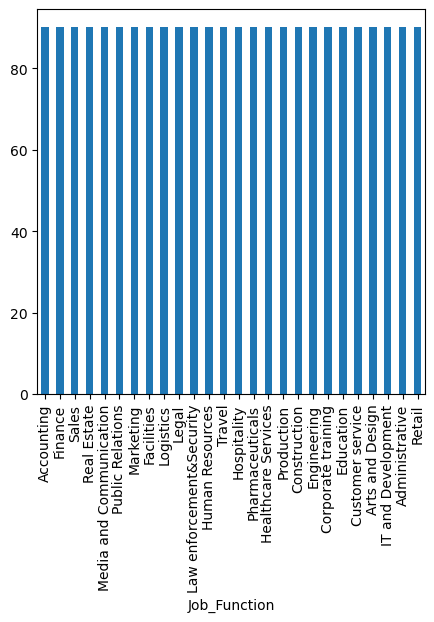

Job_Function
Accounting                  90
Finance                     90
Sales                       90
Real Estate                 90
Media and Communication     90
Public Relations            90
Marketing                   90
Facilities                  90
Logistics                   90
Legal                       90
Law enforcement&Security    90
Human Resources             90
Travel                      90
Hospitality                 90
Pharmaceuticals             90
Healthcare Services         90
Production                  90
Construction                90
Engineering                 90
Corporate training          90
Education                   90
Customer service            90
Arts and Design             90
IT and Development          90
Administrative              90
Retail                      90
Name: count, dtype: int64


In [5]:
barplot_statistic.sampleSize_category(train, config.TARGET)

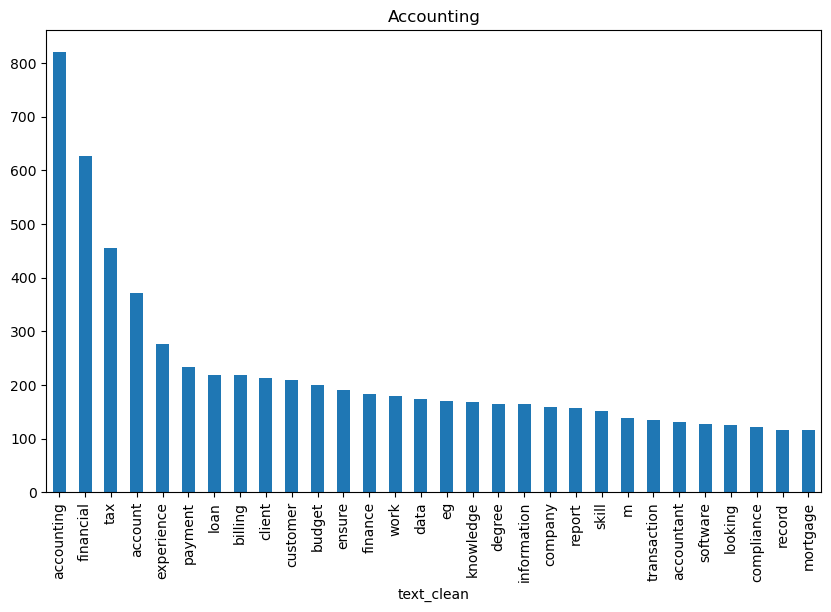

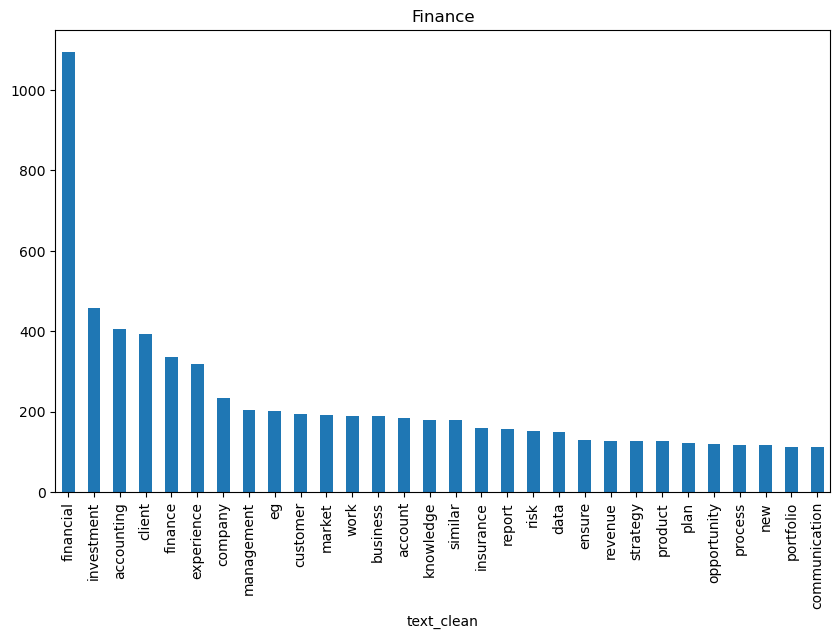

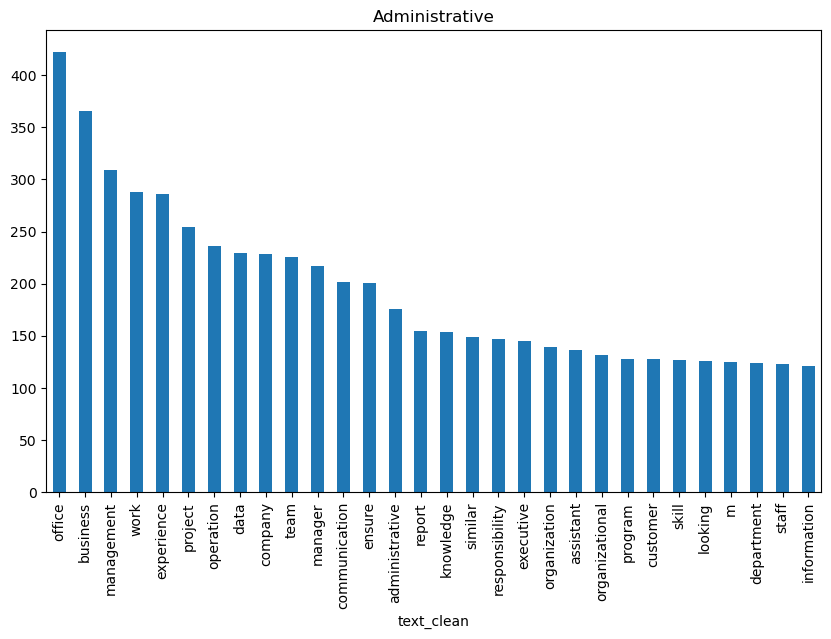

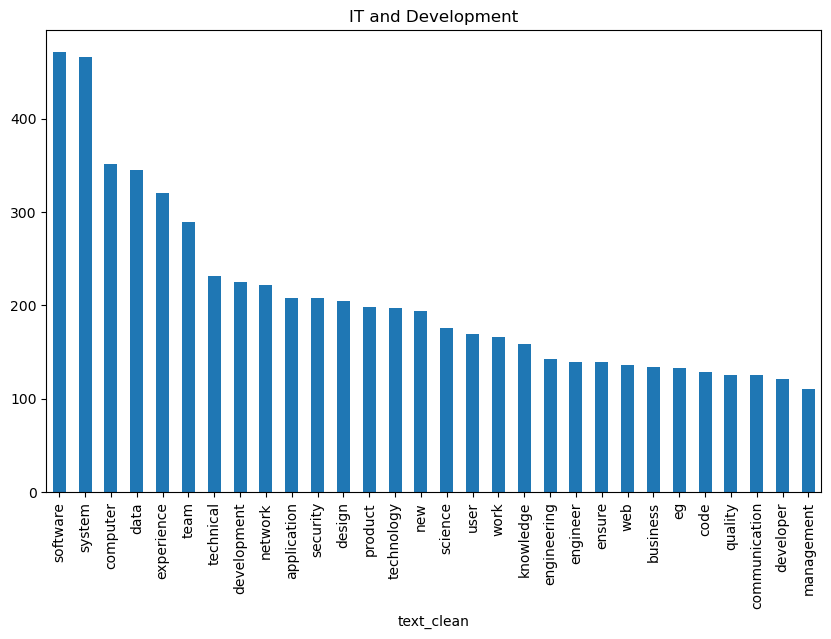

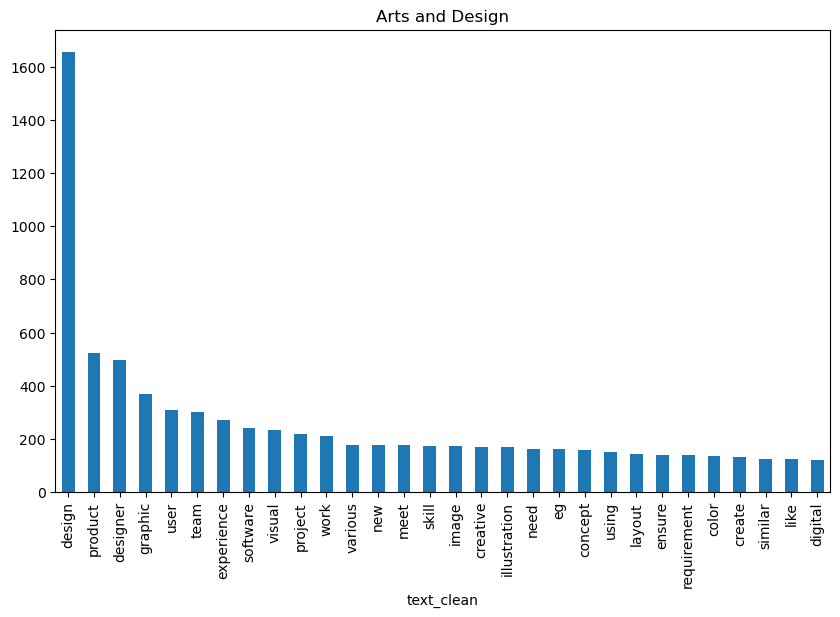

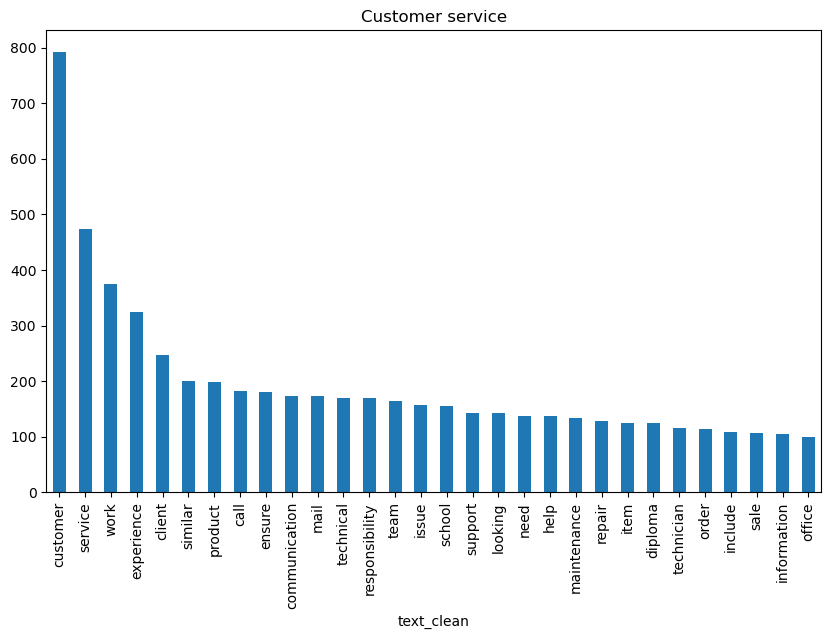

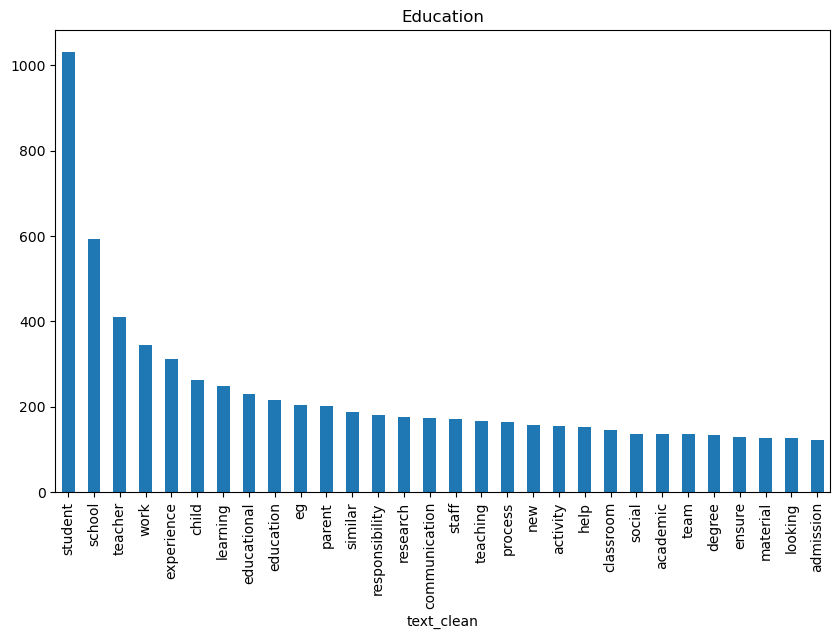

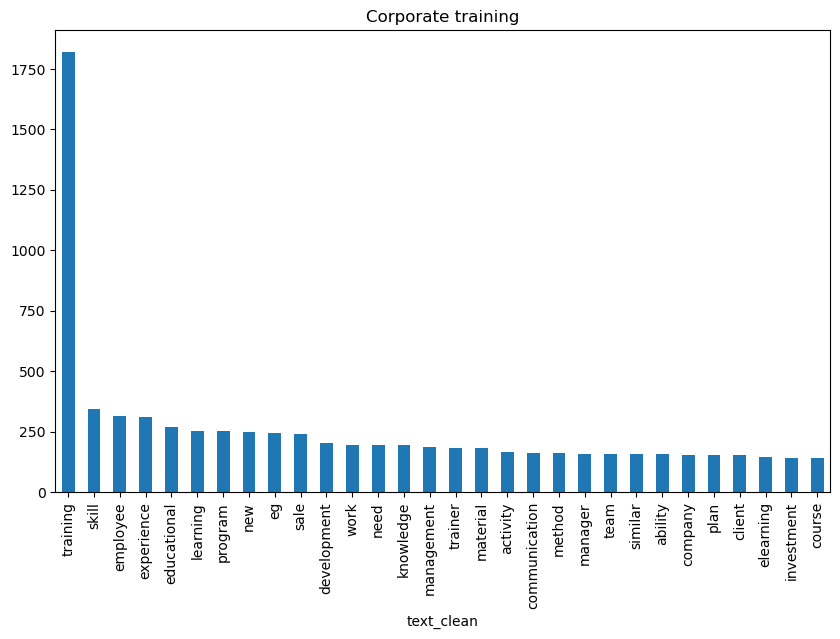

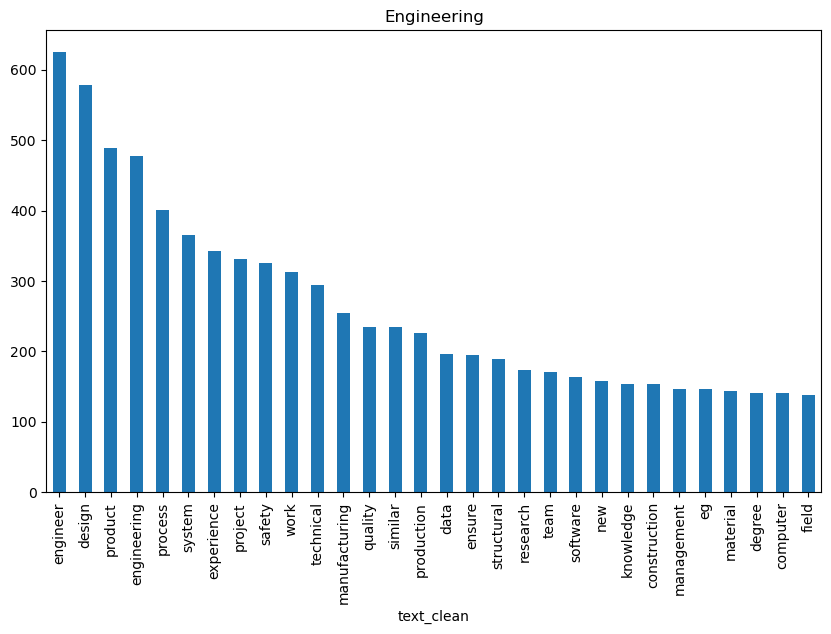

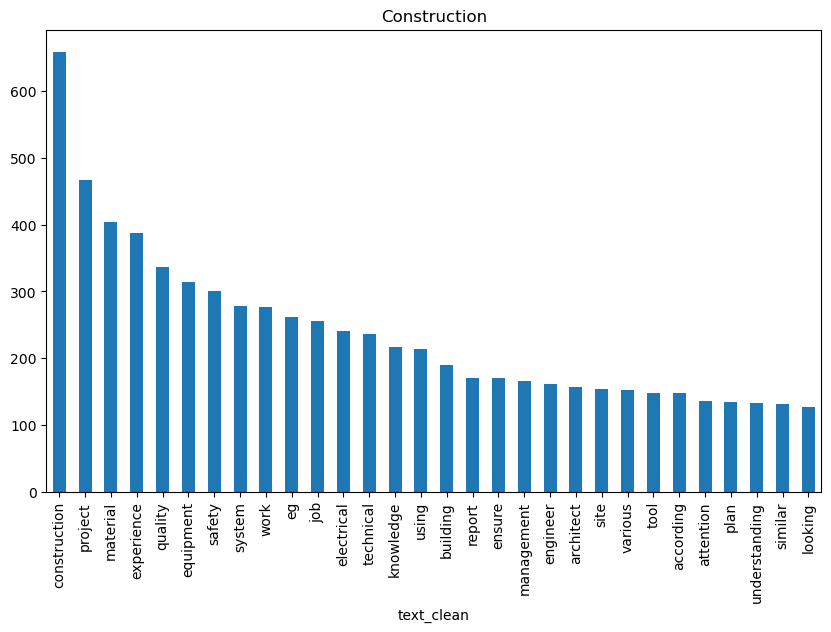

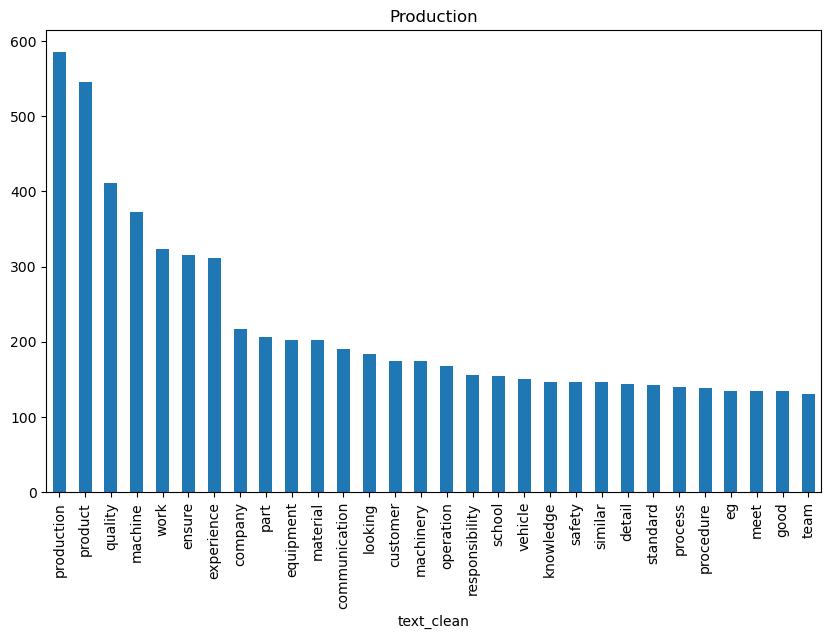

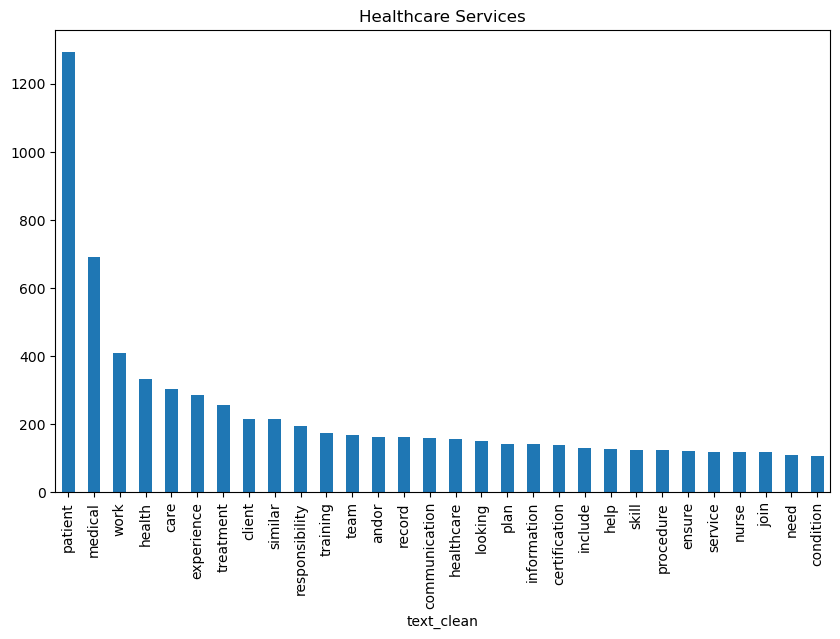

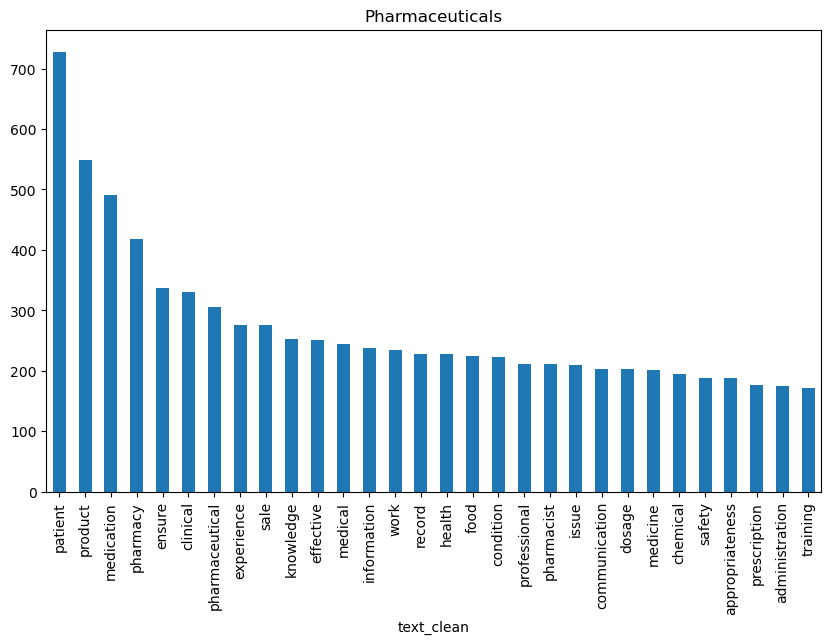

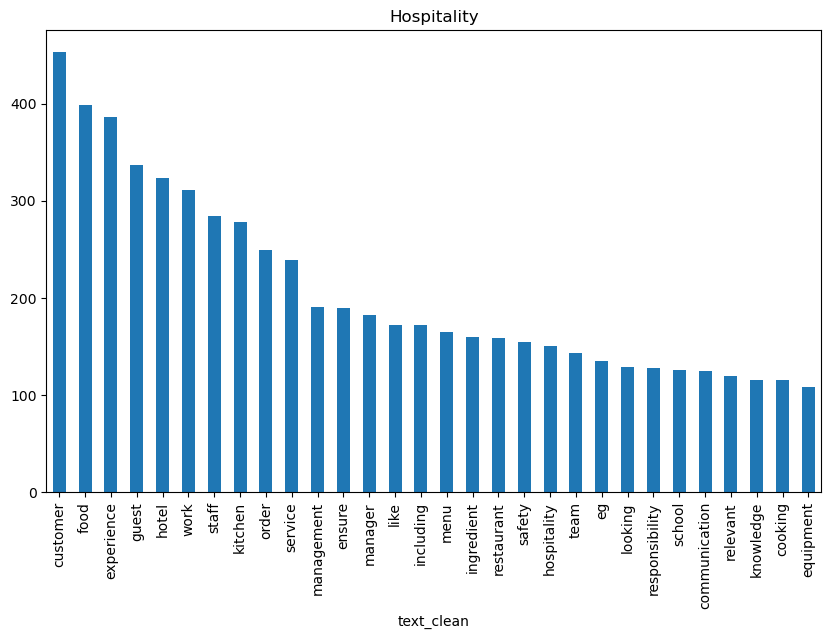

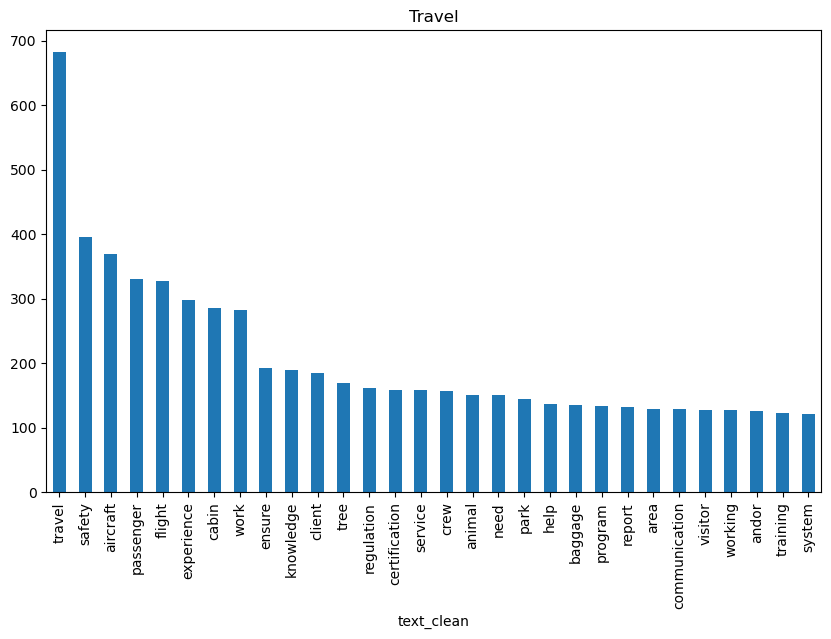

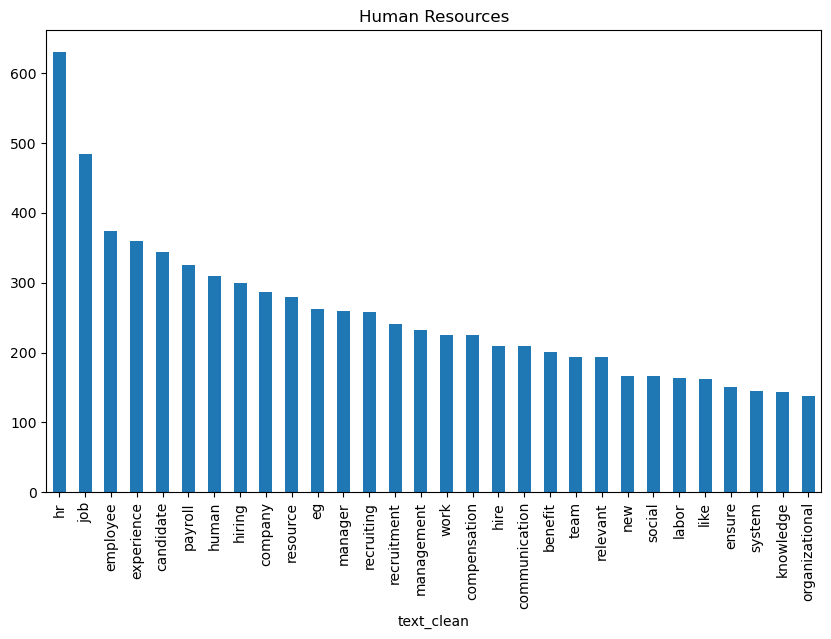

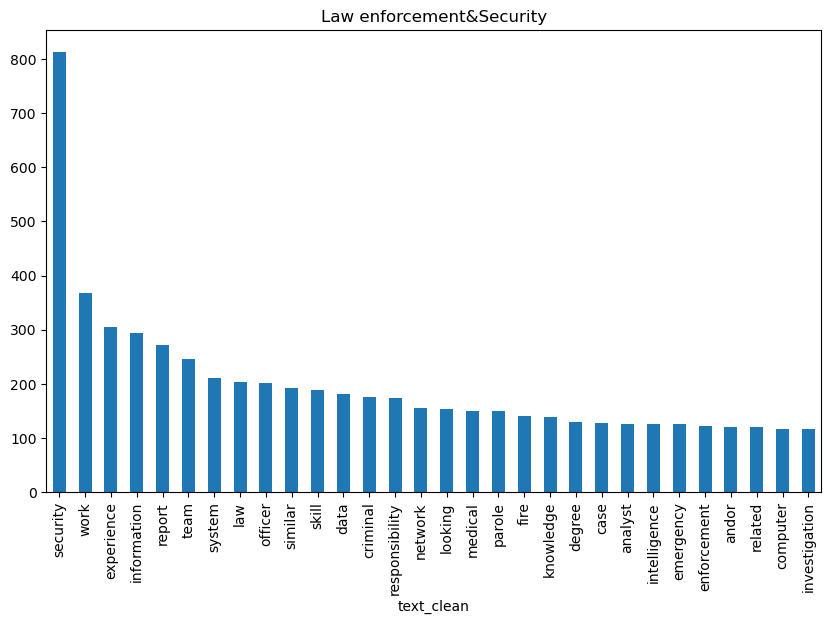

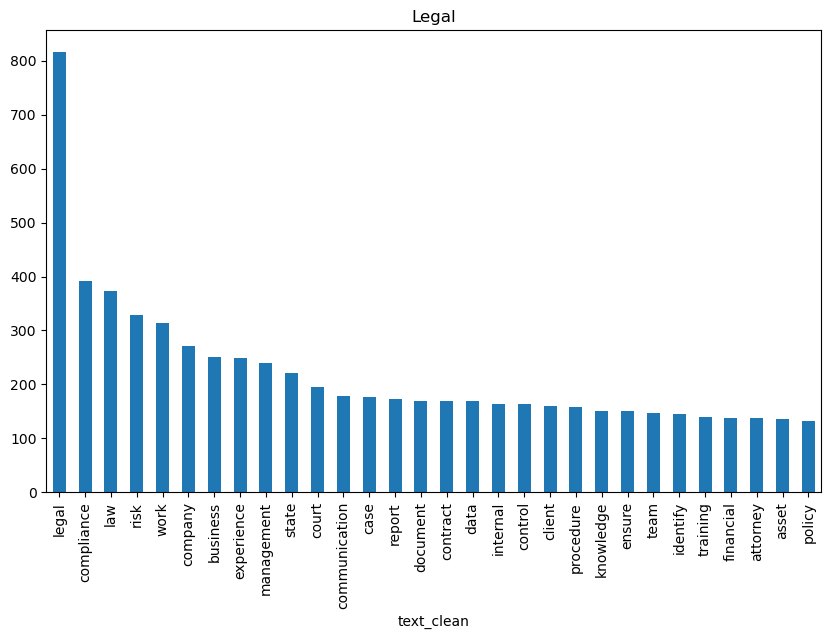

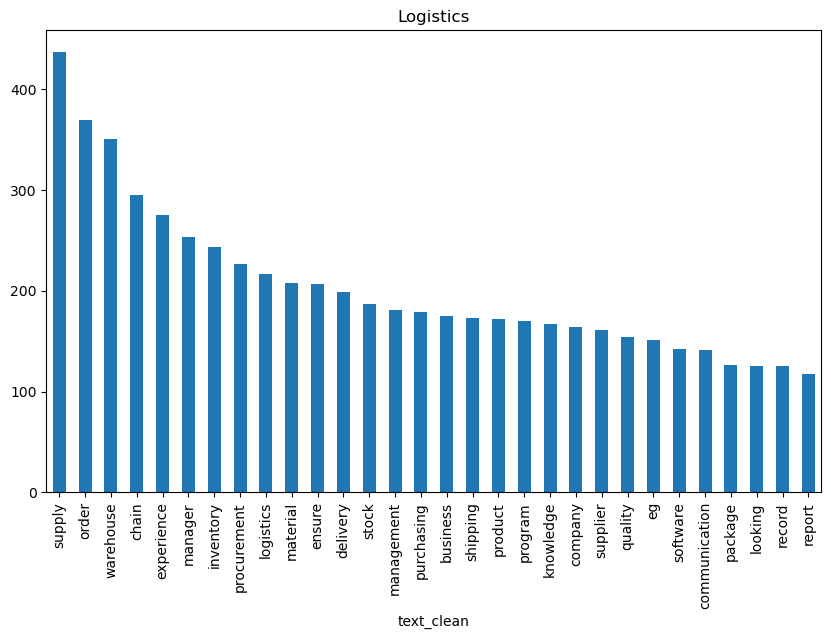

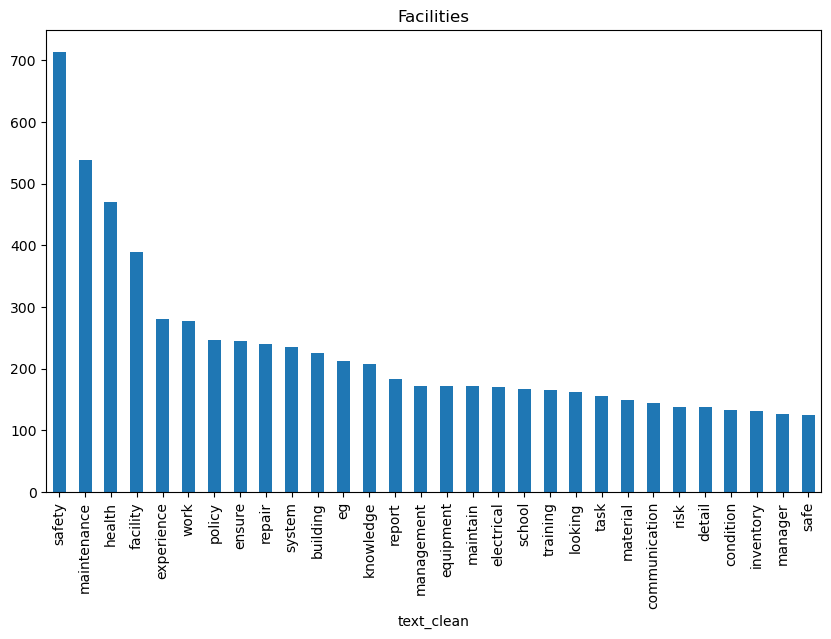

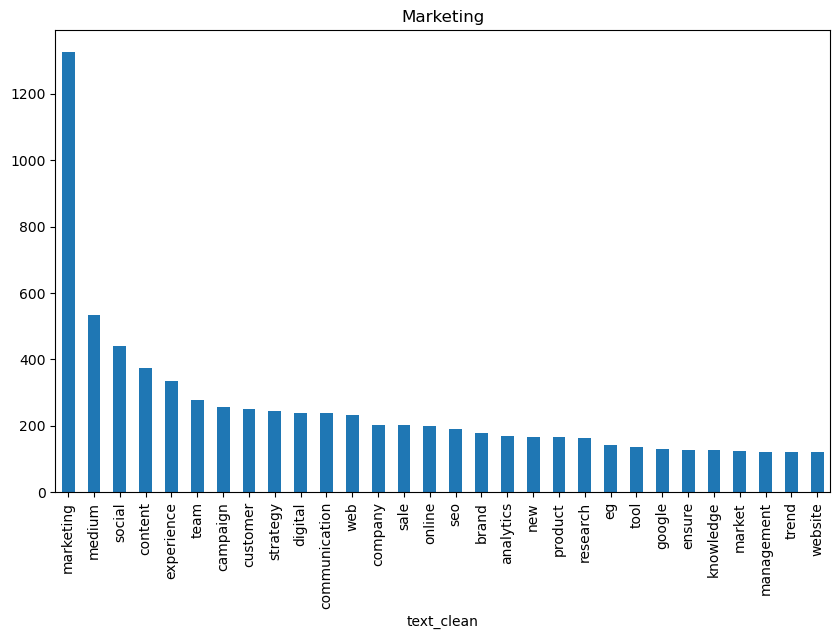

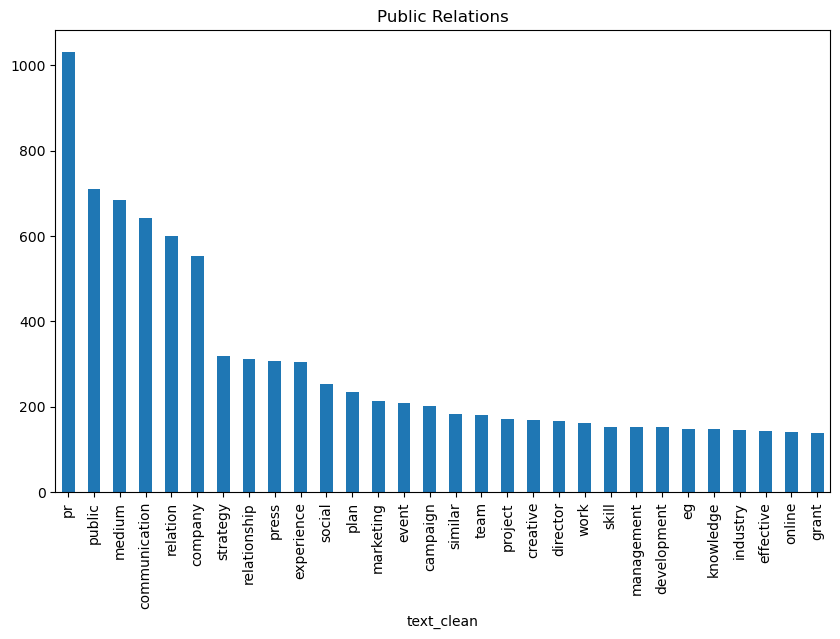

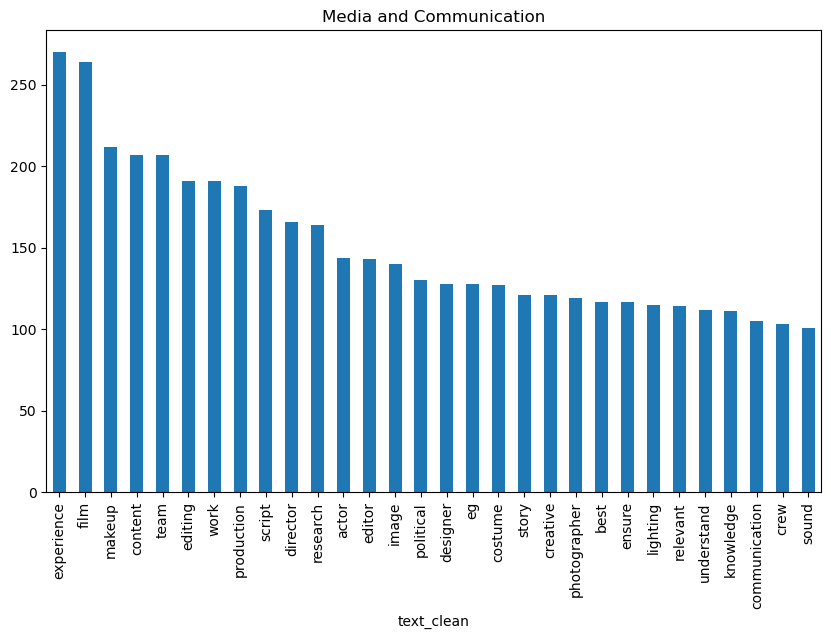

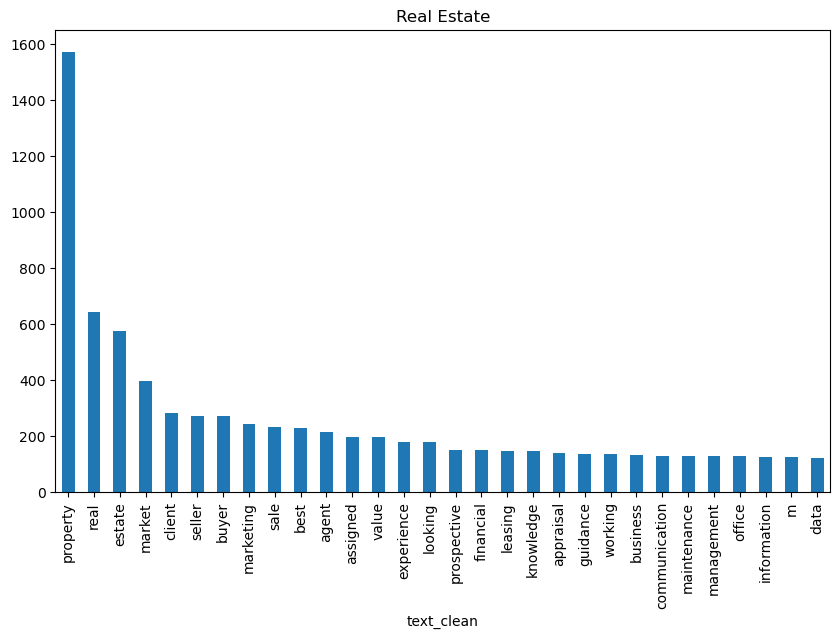

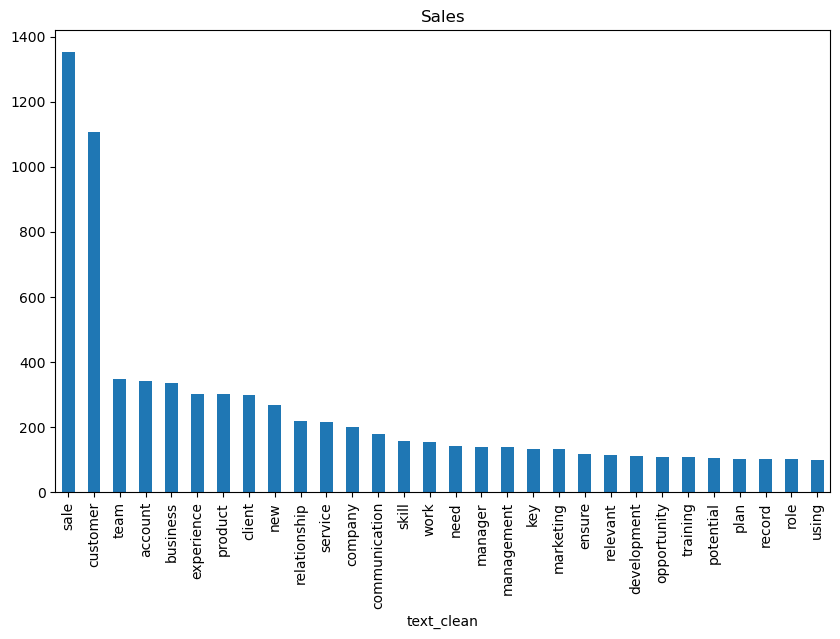

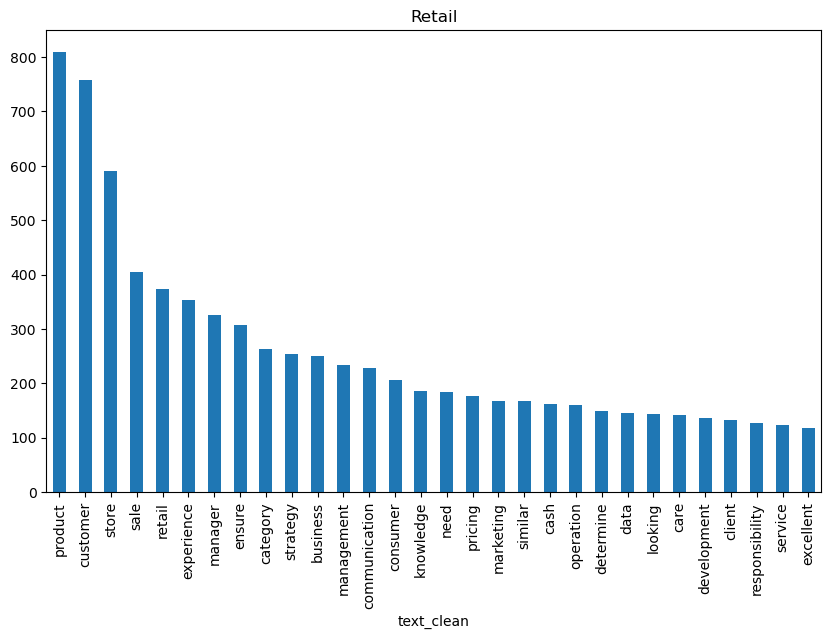

In [6]:
for label in train_df[config.TARGET].unique():
    barplot_statistic.tokenFreq_category(train_df, config.TARGET,label = label)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from train_Classifier import trainClassifier
from train_Classifier.trainClassifier import JobFunClassifier_model

In [8]:
estimators = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42),
    CalibratedClassifierCV(estimator=LinearSVC()),
    LogisticRegression(random_state=42),
    SVC(probability=True, random_state=42)
]

clssifier_scores = trainClassifier.Classifier_perform_score(train_df, config.TARGET, estimators=estimators)

/Users/lutingchiu/miniconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/lutingchiu/miniconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/lutingchiu/miniconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/lutingchiu/miniconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [9]:
clssifier_scores

,estimator_name,mean_accuracy,standard_variation
0,RandomForestClassifier,0.793590,0.029310
1,CalibratedClassifierCV,0.950000,0.017433
2,LogisticRegression,0.934615,0.018842
3,SVC,0.944017,0.021179


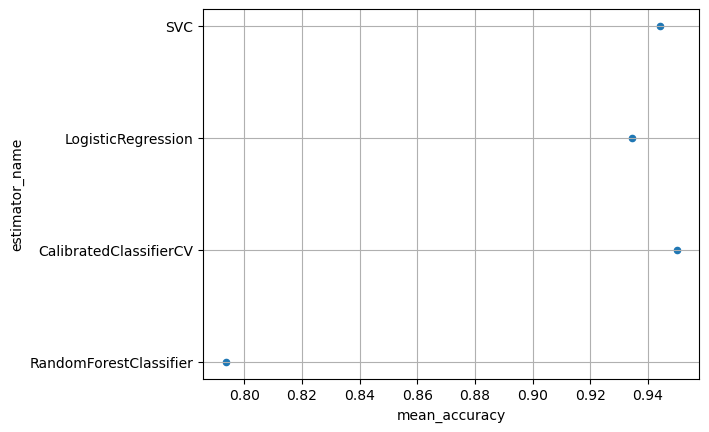

In [10]:
import matplotlib.pyplot as plt
clssifier_scores.plot.scatter(y = 'estimator_name', x = "mean_accuracy", grid = True)
plt.show()

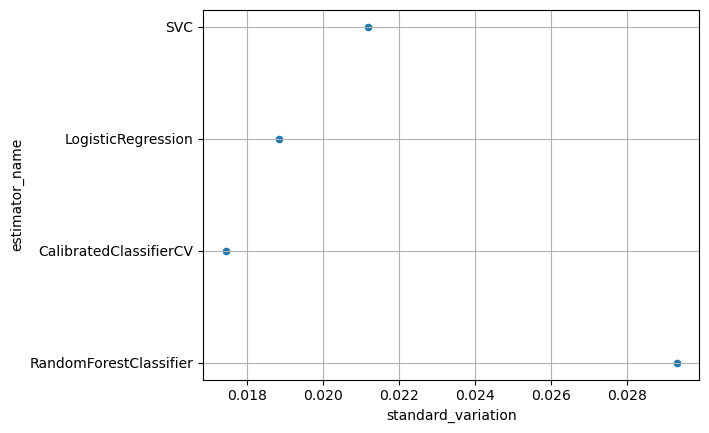

In [11]:
clssifier_scores.plot.scatter(y = 'estimator_name', x = "standard_variation", grid = True)
plt.show()

In [12]:
X_train, y_train = train_df["text_clean"], train_df[config.TARGET]
X_test , y_test = test_df["text_clean"] , test_df[config.TARGET]

In [13]:
model1 = JobFunClassifier_model(X_train, y_train)
estimator = CalibratedClassifierCV(estimator=LinearSVC())
model1.build_model(estimator=estimator)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=   0.4s


/Users/lutingchiu/miniconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/lutingchiu/miniconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/lutingchiu/miniconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/lutingchiu/miniconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.9s


In [14]:
model1.save_model(outdir = "./model/", modelname = "CCCV_model.bin")

In [15]:
print(model1.get_accuracy(X_test=X_test, y_test=y_test))

96.51006711409396


In [16]:
print(model1.get_classification_report(X_test=X_test, y_test=y_test))

                          precision    recall  f1-score   support

              Accounting       1.00      0.97      0.98        30
          Administrative       0.64      0.58      0.61        12
         Arts and Design       0.97      1.00      0.98        30
            Construction       0.97      0.97      0.97        30
      Corporate training       1.00      1.00      1.00        30
        Customer service       0.89      0.83      0.86        30
               Education       0.94      1.00      0.97        30
             Engineering       0.94      0.97      0.95        30
              Facilities       1.00      1.00      1.00        30
                 Finance       0.97      0.97      0.97        30
     Healthcare Services       0.91      0.97      0.94        30
             Hospitality       1.00      0.93      0.97        30
         Human Resources       1.00      0.97      0.98        30
      IT and Development       0.92      0.92      0.92        13
Law enfor

<Figure size 800x600 with 0 Axes>

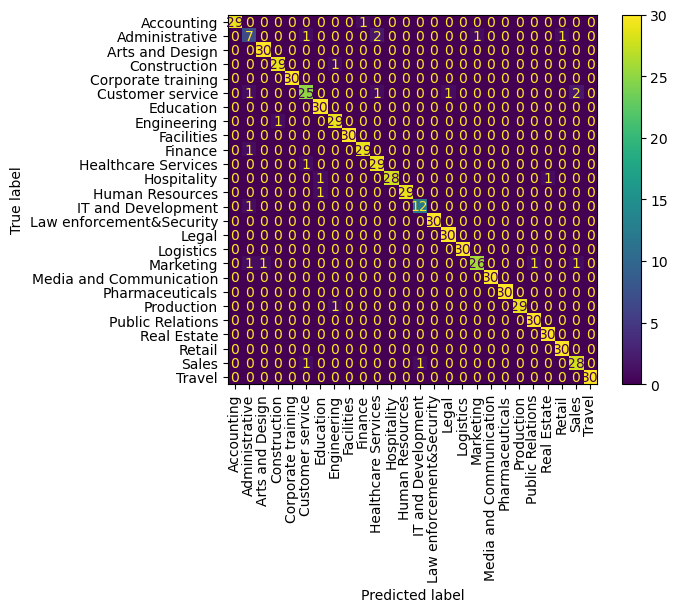

[[29  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  7  0  0  0  1  0  0  0  0  2  0  0  0  0  0  0  1  0  0  0  0  0  1
   0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 29  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  1  0  0  0 25  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0
   2  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  1  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  1  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  1  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  1  0
   0  0]
 [ 0

In [17]:
cm = model1.get_confusion_matrix_plot(X_test=X_test, y_test=y_test,plot = True)
print(cm)